# Resolução do Case: Parte 1

Nesta primeira parte da resolução do case vamos focar na resolução da primeira pergunta. A razão disso é que ela trata 
da análise explorátoria dos dados e exige um notebook separado para abordarmos várias informações contidas em cada coluna de cada tabela, como será demonstrado abaixo.

## Pacotes

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Carrega base

* Vamos carregar as bases que serão utilizadas na análise

In [3]:
# Carrega a base dos jogos

df_super_bowls = pd.read_csv("../data/super_bowls.csv", sep=";")
print(df_super_bowls.shape)
df_super_bowls.head()

(52, 18)


,data,edicao_super_bowl,estadio,cidade,estado,numero_torcedores,time_vencedor,pontos_vencedor,quarterback_vencedor_1,quarterback_vencedor_2,tecnico_vencedor,time_perdedor,pontos_perdedor,quarterback_perdedor_1,quarterback_perdedor_2,tecnico_perdedor,pontos_total,pontos_diferenca
0,04/02/2018,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,05/02/2017,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,07/02/2016,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,01/02/2015,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,02/02/2014,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


In [4]:
# Mostra colunas

df_super_bowls.columns

Index(['data', 'edicao_super_bowl', 'estadio', 'cidade', 'estado',
       'numero_torcedores', 'time_vencedor', 'pontos_vencedor',
       'quarterback_vencedor_1', 'quarterback_vencedor_2', 'tecnico_vencedor',
       'time_perdedor', 'pontos_perdedor', 'quarterback_perdedor_1',
       'quarterback_perdedor_2', 'tecnico_perdedor', 'pontos_total',
       'pontos_diferenca'],
      dtype='object')

In [5]:
# Carrega a base que contém as transmissões dos jogos

df_tv = pd.read_csv("../data/tv.csv", sep=";")
print(df_tv.shape)
df_tv.head()

(53, 6)


,edicao_super_bowl,canal,media_us_telespectadores,total_us_telespectadores,nota_telespectadores,custos_anuncio
0,52,NBC,"103,390,000.00",NaN,43.1,"5,000,000.00"
1,51,Fox,"111,319,000.00","172,000,000.00",45.3,"5,000,000.00"
2,50,CBS,"111,864,000.00","167,000,000.00",46.6,"5,000,000.00"
3,49,NBC,"114,442,000.00","168,000,000.00",47.5,"4,500,000.00"
4,48,Fox,"112,191,000.00","167,000,000.00",46.7,"4,000,000.00"


In [6]:
# Carrega a base que contém as informações dos shows

df_show = pd.read_csv("../data/musicos_show_intervalo.csv", sep=";")
print(df_show.shape)
df_show.head()

(134, 3)


,edicao_super_bowl,musico,numero_musicas
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


## Tratamento da Base
* Vamos primeiro encontrar o período de tempo que temos na base.
* Vamos avaliar a ocorrência dos missing values  

In [7]:
df_super_bowls.dtypes

data                      object
edicao_super_bowl          int64
estadio                   object
cidade                    object
estado                    object
numero_torcedores          int64
time_vencedor             object
pontos_vencedor            int64
quarterback_vencedor_1    object
quarterback_vencedor_2    object
tecnico_vencedor          object
time_perdedor             object
pontos_perdedor            int64
quarterback_perdedor_1    object
quarterback_perdedor_2    object
tecnico_perdedor          object
pontos_total               int64
pontos_diferenca           int64
dtype: object

In [40]:
# Converte a data para o formato datetime 

df_super_bowls['data'] = pd.to_datetime(df_super_bowls['data'])

In [41]:
data_min = df_super_bowls['data'].min()
data_max = df_super_bowls['data'].max()
print("Os registros dos jogos contidos na base estão entre {} e {}".format(data_min, data_max))

Os registros dos jogos contidos na base estão entre 1967-01-15 00:00:00 e 2018-04-02 00:00:00


In [10]:
# Mostrando a porcentagem de missing values em cada coluna

(df_super_bowls.isnull().sum() / len(df_super_bowls) ) * 100

data                       0.000000
edicao_super_bowl          0.000000
estadio                    0.000000
cidade                     0.000000
estado                     0.000000
numero_torcedores          0.000000
time_vencedor              0.000000
pontos_vencedor            0.000000
quarterback_vencedor_1     0.000000
quarterback_vencedor_2    96.153846
tecnico_vencedor           0.000000
time_perdedor              0.000000
pontos_perdedor            0.000000
quarterback_perdedor_1     0.000000
quarterback_perdedor_2    94.230769
tecnico_perdedor           0.000000
pontos_total               0.000000
pontos_diferenca           0.000000
dtype: float64

In [11]:
# Mostrando a porcentagem de missing values em cada coluna

(df_tv.isnull().sum() / len(df_tv)) * 100

edicao_super_bowl            0.000000
canal                        0.000000
media_us_telespectadores     0.000000
total_us_telespectadores    71.698113
nota_telespectadores         0.000000
custos_anuncio               0.000000
dtype: float64

In [12]:
# Mostrando a porcentagem de missing values em cada coluna

(df_show.isnull().sum() / len(df_show)) * 100

edicao_super_bowl     0.000000
musico                0.000000
numero_musicas       34.328358
dtype: float64

Com relação aos missing values:
  * Note que as colunas quarterback_vencedor_2 e quarterback_perdedor_2 tem missing values acima de 94% 
  * A coluna total_us_telespectadores tem 71% de missing values. Enquanto a numero_musicas tem 34%.

## Pergunta 1:

###  Realize uma análise exploratória das tabelas, elaborando gráficos de colunas (média e desvio padrão) para as principais variáveis. Existem variáveis com outliers?

* Aqui vamos fazer uma análise exploratória dos dados para cada tabela

### Tabela Super Bowl 

In [13]:
df_super_bowls.columns

Index(['data', 'edicao_super_bowl', 'estadio', 'cidade', 'estado',
       'numero_torcedores', 'time_vencedor', 'pontos_vencedor',
       'quarterback_vencedor_1', 'quarterback_vencedor_2', 'tecnico_vencedor',
       'time_perdedor', 'pontos_perdedor', 'quarterback_perdedor_1',
       'quarterback_perdedor_2', 'tecnico_perdedor', 'pontos_total',
       'pontos_diferenca'],
      dtype='object')

**Quais estádios tiveram mais jogos no intervalo de tempo dos registros?**

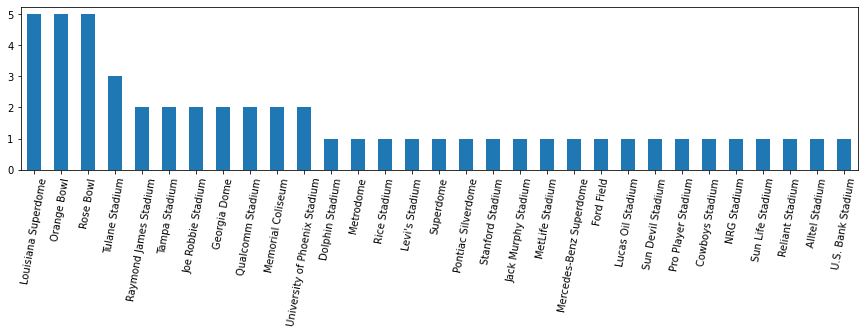

In [14]:
df_super_bowls['estadio'].value_counts(normalize=False).plot(kind='bar', rot=80, figsize=(15,3))
plt.show()

**Quais cidades tiveram mais jogos no intervalo de tempo dos registros?**

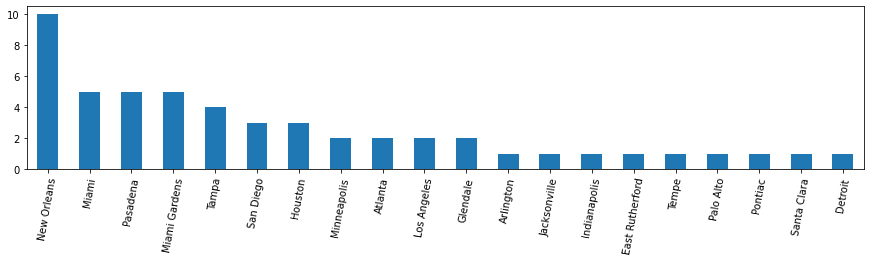

In [15]:
df_super_bowls['cidade'].value_counts(normalize=False).plot(kind='bar', rot=80, figsize=(15,3))
plt.show()

**Quais Estados tiveram mais jogos no intervalo de tempo dos registros?**

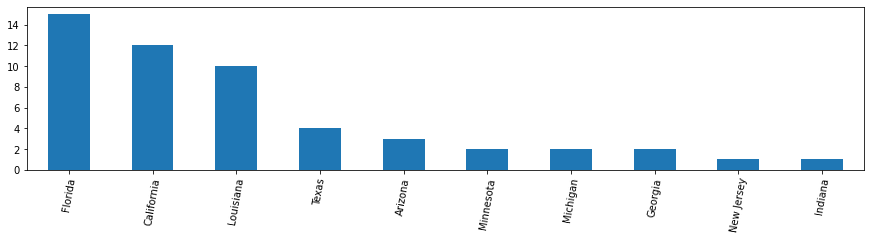

In [16]:
df_super_bowls['estado'].value_counts(normalize=False).plot(kind='bar', rot=80, figsize=(15,3))
plt.show()

**Como a quantidade de torcedores está distribuída com relação à média?**

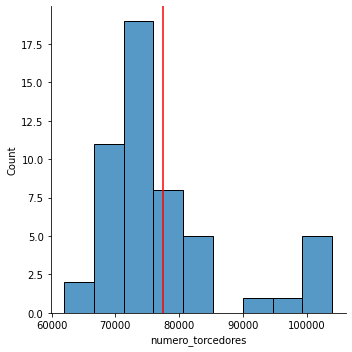

In [17]:
sns.displot(data=df_super_bowls['numero_torcedores'])
plt.axvline(x=df_super_bowls['numero_torcedores'].mean(), color='r', linestyle='-')
plt.show()

In [18]:
df_super_bowls['numero_torcedores'].mean()

77455.94230769231

Nota:
  * A média do número de torcedores fica em torno de 77455.942
  * Existe alguns jogos que tiveram quantidade de torcedores bem acima da média.

**Quais são os outliers dessa variável?**

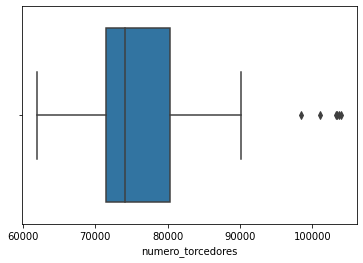

In [19]:
sns.boxplot(x="numero_torcedores", data=df_super_bowls)
plt.show()

In [20]:
# Vamos obter a qte de outliers com relação a essa variável.

quartiles = df_super_bowls['numero_torcedores'].quantile([.25, .5, .75]).values

iqr = quartiles[2]-quartiles[0]    # Interquartile range
fence_low  = quartiles[0]-1.5*iqr
fence_high = quartiles[2]+1.5*iqr

len(df_super_bowls[df_super_bowls['numero_torcedores'] >= fence_high]['numero_torcedores'])

6

Nota:
  * Exitem cerca de 6 jogos que tiveram número de torcedores bem acima dos outros jogos. São os outliers.
  * Não vamos eliminar estes outliers por que vamos usá-los para entender como as outras informações se relacionam com eles.

In [21]:
# Vamos agora encontrar quais são esses jogos.
indices = df_super_bowls[df_super_bowls['numero_torcedores'] >= fence_high]['numero_torcedores'].index
indices

# Abaixo está as informações desses seis jogos
df_super_bowls.loc[indices, ['data','estadio', 'cidade', 'estado', 'numero_torcedores', 
                             'time_vencedor', 'pontos_vencedor','time_perdedor','pontos_perdedor']]

,data,estadio,cidade,estado,numero_torcedores,time_vencedor,pontos_vencedor,time_perdedor,pontos_perdedor
7,2011-06-02,Cowboys Stadium,Arlington,Texas,103219,Green Bay Packers,31,Pittsburgh Steelers,25
25,1993-01-31,Rose Bowl,Pasadena,California,98374,Dallas Cowboys,52,Buffalo Bills,17
31,1987-01-25,Rose Bowl,Pasadena,California,101063,New York Giants,39,Denver Broncos,20
35,1983-01-30,Rose Bowl,Pasadena,California,103667,Washington Redskins,27,Miami Dolphins,17
38,1980-01-20,Rose Bowl,Pasadena,California,103985,Pittsburgh Steelers,31,Los Angeles Rams,19
41,1977-09-01,Rose Bowl,Pasadena,California,103438,Oakland Raiders,32,Minnesota Vikings,14


**Quais estadios receberam mais torcedores?**

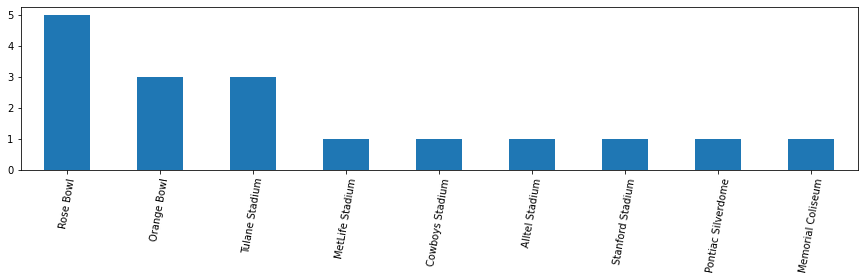

In [22]:
# Vamos usar a media como referência

mean = df_super_bowls['numero_torcedores'].mean()
df_super_bowls[df_super_bowls['numero_torcedores']>=mean]['estadio'].\
value_counts(normalize=False).plot(kind='bar', rot=80, figsize=(15,3))
plt.show()

Nota:
  * Os estádios Rose Bowl e Orange Bowl receberam qte de torcedores acima da média e tbm foram estádios que mais receberam jogos.
  * Vale notar que o estádio Louisiana Superdome, apesar de ter sido um que recebeu a maioria do jogos, isso não se refletiu em um grande número de torcedores.

**Quais times mais vencedores?**

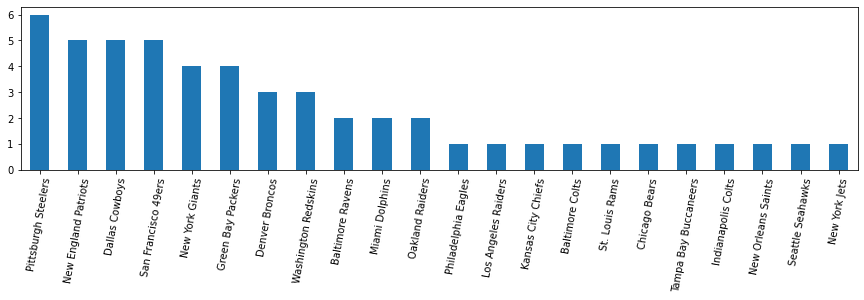

In [23]:
df_super_bowls['time_vencedor'].value_counts(normalize=False).plot(kind='bar', rot=80, figsize=(15,3))
plt.show()

**Como os pontos dos vencedores estão distribuídos com relação à média?**

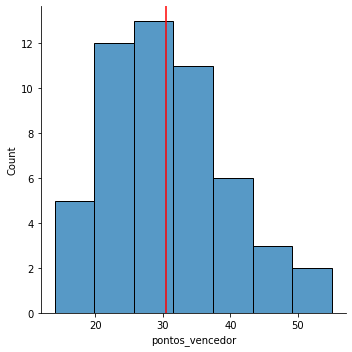

In [24]:
sns.displot(data=df_super_bowls['pontos_vencedor'])
plt.axvline(x=df_super_bowls['pontos_vencedor'].mean(), color='r', linestyle='-')
plt.show()

**Quais são os outliers dessa variável?**

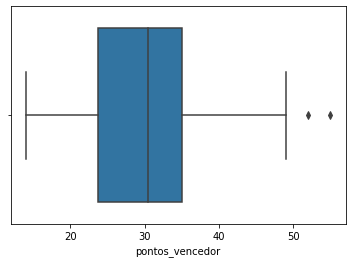

In [25]:
sns.boxplot(x="pontos_vencedor", data=df_super_bowls)
plt.show()

In [26]:
quartiles = df_super_bowls['pontos_vencedor'].quantile([.25, .5, .75]).values

iqr = quartiles[2]-quartiles[0] #Interquartile range
fence_low  = quartiles[0]-1.5*iqr
fence_high = quartiles[2]+1.5*iqr

#len(df_super_bowls[df_super_bowls['pontos_vencedor'] >= fence_high]['pontos_vencedor'])

indices = df_super_bowls[df_super_bowls['pontos_vencedor'] >= fence_high]['pontos_vencedor'].index
indices

df_super_bowls.loc[indices, ['data','estadio', 'cidade', 'estado', 'numero_torcedores', 
                             'time_vencedor', 'pontos_vencedor','time_perdedor','pontos_perdedor']]

,data,estadio,cidade,estado,numero_torcedores,time_vencedor,pontos_vencedor,time_perdedor,pontos_perdedor
25,1993-01-31,Rose Bowl,Pasadena,California,98374,Dallas Cowboys,52,Buffalo Bills,17
28,1990-01-28,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Denver Broncos,10


Nota:
  * Na informação acima, vemos as informações dos dois jogos cujo vencedor obteve pontos bem acima do conjunto de pontos.

**Quais times venceram com mais pontos?**

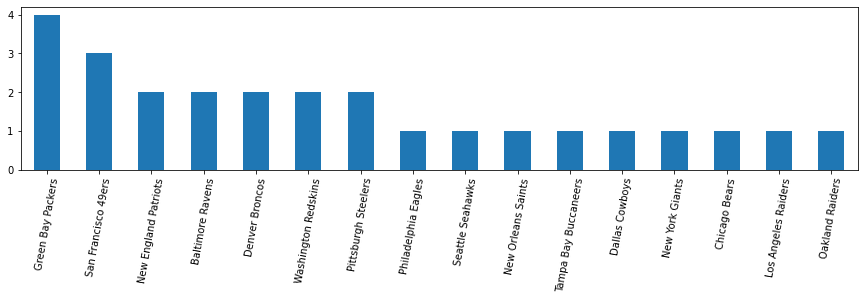

In [27]:
# Vamos usar a media como referência

mean = df_super_bowls['pontos_vencedor'].mean()
df_super_bowls[df_super_bowls['pontos_vencedor']>=mean]['time_vencedor'].\
value_counts(normalize=False).plot(kind='bar', rot=80, figsize=(15,3))
plt.show()

**Quais os 10 técnicos mais conseguiram vitórias no jogos?**

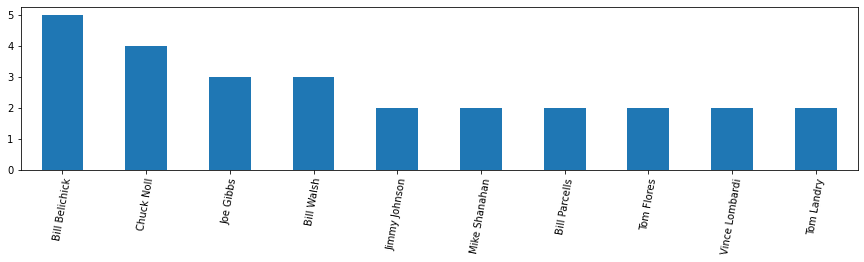

In [28]:
df_super_bowls['tecnico_vencedor'].value_counts(normalize=False)[0:10].plot(kind='bar', rot=80, figsize=(15,3))
plt.show()

**Quais os 10 técnicos mais tiveram derrotas no jogos?**

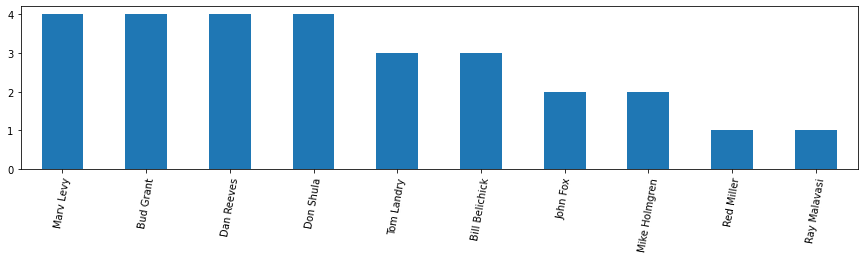

In [29]:
df_super_bowls['tecnico_perdedor'].value_counts(normalize=False)[0:10].plot(kind='bar', rot=80, figsize=(15,3))
plt.show()

**Como as diferenças de pontos estão distribuídos com relação à média?**

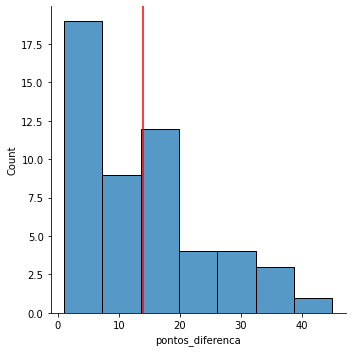

In [30]:
# df_super_bowls['pontos_diferenca']

sns.displot(data=df_super_bowls['pontos_diferenca'])
plt.axvline(x=df_super_bowls['pontos_diferenca'].mean(), color='r', linestyle='-')
plt.show()

**Qual a evolução temporal do número de torcedores?**

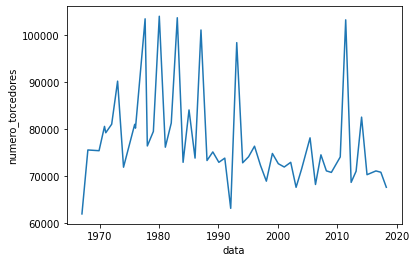

In [31]:
sns.lineplot(data=df_super_bowls, x="data", y="numero_torcedores")
plt.show()

Nota:
  * Note que, antes dos anos 90, tivemos grandes variações no número de torcedores chegando a 10 mil a cada 3 anos. 
  * Depois dos anos 2000, esse número se estabilizou em torno de 7 mil torcedores. Chegando a 10 mil apenas no ano de 2011.

### Tabela tv

In [32]:
df_tv.head()

,edicao_super_bowl,canal,media_us_telespectadores,total_us_telespectadores,nota_telespectadores,custos_anuncio
0,52,NBC,"103,390,000.00",NaN,43.1,"5,000,000.00"
1,51,Fox,"111,319,000.00","172,000,000.00",45.3,"5,000,000.00"
2,50,CBS,"111,864,000.00","167,000,000.00",46.6,"5,000,000.00"
3,49,NBC,"114,442,000.00","168,000,000.00",47.5,"4,500,000.00"
4,48,Fox,"112,191,000.00","167,000,000.00",46.7,"4,000,000.00"


In [33]:
df_tv.columns

Index(['edicao_super_bowl', 'canal', 'media_us_telespectadores',
       'total_us_telespectadores', 'nota_telespectadores', 'custos_anuncio'],
      dtype='object')

**Quais canais mais transmitiram jogos e mais ganham com anúncios (%)?**

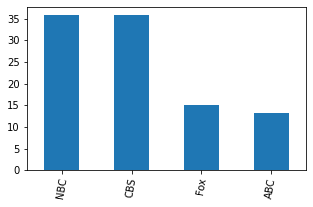

In [34]:
(df_tv['canal'].value_counts(normalize=True)*100).plot(kind='bar', rot=80, figsize=(5,3))
plt.show()

In [35]:
df_tv['custos_anuncio'] = df_tv['custos_anuncio'].apply(lambda x: x.replace(",","") )

df_tv['custos_anuncio'] = df_tv['custos_anuncio'].astype(float, errors = 'raise')

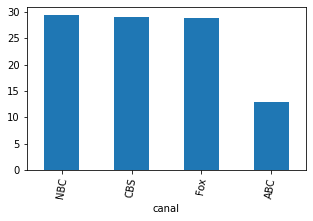

In [36]:
# Calcula o total dos custos dos anuncios em cada canal
df_canal_custos = df_tv.groupby('canal').agg({'custos_anuncio': 'sum'}).\
                rename(columns={'custos_anuncio': 'sum_custos_anuncio'}).\
                sort_values(by=['sum_custos_anuncio'], ascending=False)

# Normaliza esses valores
df_canal_custos['normal_custos_anuncio'] = (df_canal_custos['sum_custos_anuncio']/
                                            df_canal_custos['sum_custos_anuncio'].sum())*100

#Visão gráfica das porcentagens dos custos para cada canal
df_canal_custos['normal_custos_anuncio'].plot(kind='bar', rot=80, figsize=(5,3))
plt.show()

Nota:
  * No primeiro gráfico, vemos que os canais NBC e CBS correspondem a quase 35% (cada) de total a transmissão dos jogos. Enquanto que os canais FOX e ABC ficam abaixo de 15%. 
  * Por outro lado, em termos de ganhos com anúncios, a NBC, CBS E FOX são quase 30% (cada) do total de ganhos com anúncios. 
  * Concluímos que a FOX é mais eficiente por que ela transmite menos jogos para ter quase o mesmo ganho com anúncios dos que mais transmitem.

**Como estão distribuídas as notas dadas pelos telespectadores para cada canal?**

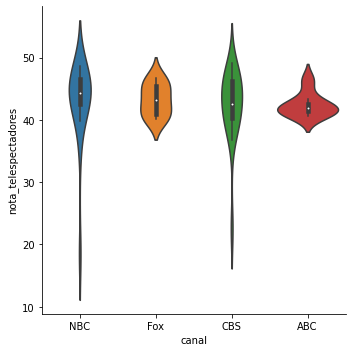

In [37]:
sns.catplot(x="canal", y="nota_telespectadores", data=df_tv, kind="violin")
plt.show()

Nota:
  * Podemos ver que a maioria das notas dadas fica em torno de 40-45 para todos dos canais.
  * Podemos notar que os canais NBC e CBS tem uma maior variabilidade nas notas que receberam. 
  * Por outro lado, a FOX e ABC receberam notas mais concentradas em torno da média. 
  * Vale notar que a ABC apesar de ter menos transmissões e ganhar menos com anúncios eles recebem notas mais parecidas.
  * O canal FOX, que é mais eficiente na relação ganhos de anúncios por transmissão, também recebe notas parecidas e boas.

### Tabela show

In [38]:
df_show.columns

Index(['edicao_super_bowl', 'musico', 'numero_musicas'], dtype='object')

**Quais músicos mais tocaram nos jogos?**

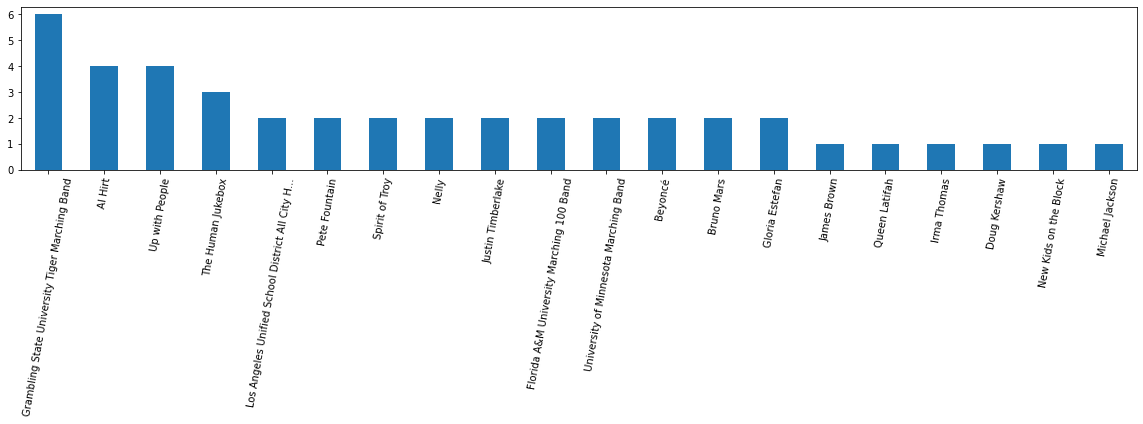

In [39]:
df_show['musico'].value_counts(normalize=False)[0:20].plot(kind='bar', rot=80, figsize=(20,3))
plt.show()

Nota:
  * A banda Grambling State University Tiger Marching Band parece ser a preferida para apresentações nos jogos.